In [ ]:
'''
1. data size ex. MB, GB
2. query_num, pd_num | train, test
3. overlap_query_num
4. In overlap_query, overlap_product_rate
'''

In [3]:
# task1 - train_data
!du -h task_1_query-product_ranking/train-v0.2.csv

41M	task_1_query-product_ranking/train-v0.2.csv


In [4]:
# task1 - product_data
!du -h task_1_query-product_ranking/product_catalogue-v0.2.csv

1010M	task_1_query-product_ranking/product_catalogue-v0.2.csv


In [1]:
# task2 - train_data
!du -h task_2_multiclass_product_classification/train-v0.2.csv

92M	task_2_multiclass_product_classification/train-v0.2.csv


In [2]:
# task2 - product_data
!du -h task_2_multiclass_product_classification/product_catalogue-v0.2.csv

2.0G	task_2_multiclass_product_classification/product_catalogue-v0.2.csv


In [1]:
import pandas as pd
from tqdm import tqdm

In [2]:
# task1 path
task1_path = 'task_1_query-product_ranking/'
task1_train_path = task1_path + 'train-v0.2.csv'
task1_test_path = task1_path + 'test_public-v0.2.csv'
task1_product_path = task1_path + 'product_catalogue-v0.2.csv'
# task2 path
task2_path = 'task_2_multiclass_product_classification/'
task2_train_path = task2_path + 'train-v0.2.csv'
task2_product_path = task2_path + 'product_catalogue-v0.2.csv'

In [3]:
# task1
task1_train_dat = pd.read_csv(task1_train_path)
task1_test_dat = pd.read_csv(task1_test_path)
task1_product_dat = pd.read_csv(task1_product_path)
# task2
task2_train_dat = pd.read_csv(task2_train_path)
task2_product_dat = pd.read_csv(task2_product_path)

In [4]:
# imputattion
task1_train_dat = task1_train_dat.fillna('Empty')
task1_test_dat = task1_test_dat.fillna('Empty')
task1_product_dat = task1_product_dat.fillna('Empty')
task2_train_dat = task2_train_dat.fillna('Empty')
task2_product_dat = task2_product_dat.fillna('Empty')

In [8]:
# ATTACH LACLE TAG
task1_product_dat = build_product_idx(task1_product_dat, locale_name='product_locale')
task1_train_dat = build_product_idx(task1_train_dat, locale_name='query_locale')
task1_test_dat = build_product_idx(task1_test_dat, locale_name='query_locale')
task2_product_dat = build_product_idx(task2_product_dat, locale_name='product_locale')
task2_train_dat = build_product_idx(task2_train_dat, locale_name='query_locale')

100%|██████████| 1834744/1834744 [00:00<00:00, 2908560.09it/s]


In [9]:
# build query2data
task1_query2data = build_query2data(target_dat=task1_train_dat, target_query_locale=['us', 'es', 'jp'])
task1_query2data_test = build_query2data(target_dat=task1_test_dat, target_query_locale=['us', 'es', 'jp'])
task2_query2data = build_query2data(target_dat=task2_train_dat, target_query_locale=['us', 'es', 'jp'])

100%|██████████| 1834744/1834744 [00:03<00:00, 597812.92it/s]


In [10]:
# build product2data
task1_pd2data = build_pd2data(given_product_dat=task1_product_dat)
task2_pd2data = build_pd2data(given_product_dat=task2_product_dat)

100%|██████████| 1815216/1815216 [00:12<00:00, 144402.14it/s]


In [14]:
# query_num, proudct_num
print('task1- query_num : ', len(task1_query2data.keys()))
print('task1- query_num_test : ', len(task1_query2data_test.keys()))
print('task2- query_num : ', len(task2_query2data.keys()))
print('task1- product_num : ', len(task1_pd2data.keys()))
print('task2- product_num : ', len(task2_pd2data.keys()))

task1- query_num :  33777
task1- query_num_test :  7245
task2- query_num :  91207
task1- product_num :  883868
task2- product_num :  1815216


In [11]:
# overlap_query_num (train, test)
overlap_train_query_set, overlap_test_query_set = set(), set()
for query in list(task1_query2data.keys()):
    if query in task2_query2data:
        overlap_train_query_set.add(query)
for query in list(task1_query2data_test.keys()):
    if query in task2_query2data:
        overlap_test_query_set.add(query)
non_overlap_query_task2 = set(task2_query2data.keys()) - overlap_train_query_set- overlap_test_query_set

In [13]:
print('overlap_train_query num : ', len(overlap_train_query_set))
print('overlap_test_query_set num : ', len(overlap_test_query_set))
print('non_overlap_query_task2 num : ', len(non_overlap_query_task2))

overlap_train_query num :  23693
overlap_test_query_set num :  5119
non_overlap_query_task2 num :  62401


In [15]:
overlap_num_list = []
for query in list(overlap_train_query_set):
    task1_pd_list = task1_query2data[query]['all']
    task1_pd_name = [task1_pd2data[pdi]['product_title'] for pdi in task1_pd_list]
    task2_pd_list = task2_query2data[query]['all']
    task2_pd_name = [task2_pd2data[pdi]['product_title'] for pdi in task2_pd_list]    
    overlap_num = len(set(task1_pd_name) & set(task2_pd_name)) / len(task1_pd_name)
    overlap_num_list.append(overlap_num)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb2109d5c18>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb2104a8208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb2109c8e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb2104a87b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb2104a8a90>],
 'means': []}

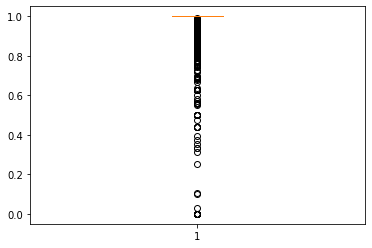

In [16]:
import matplotlib.pyplot as plt
plt.boxplot(overlap_num_list)

In [17]:
sorted(overlap_num_list)

23693

In [19]:
overlap_num_list = sorted(overlap_num_list, reverse=True)

In [31]:
overlap_num_list[23500]

0.825

In [ ]:
task2_product_dat

In [ ]:
task1_product_dat

In [32]:
task2_product_dat.head()

,product_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale,product_new_id
0,B079VKKJN7,"11 Degrees de los Hombres Playera con Logo, Ne...",Esta playera con el logo de la marca Carrier d...,11 Degrees Negro Playera con logo\nA estrenar ...,11 Degrees,Negro,es,B079VKKJN7@es
1,B079Y9VRKS,Camiseta Eleven Degrees Core TS White (M),Empty,Empty,11 Degrees,Blanco,es,B079Y9VRKS@es
2,B07DP4LM9H,11 Degrees de los Hombres Core Pull Over Hoodi...,La sudadera con capucha Core Pull Over de 11 G...,11 Degrees Azul Core Pull Over Hoodie\nA estre...,11 Degrees,Azul,es,B07DP4LM9H@es
3,B07G37B9HP,11 Degrees Poli Panel Track Pant XL Black,Empty,Empty,11 Degrees,Empty,es,B07G37B9HP@es
4,B07LCTGDHY,11 Degrees Gorra Trucker Negro OSFA (Talla úni...,Empty,Empty,11 Degrees,Negro (,es,B07LCTGDHY@es


In [33]:
task1_product_dat.head()

,product_id,product_title,product_description,product_bullet_point,product_brand,product_color_name,product_locale,product_new_id
0,B0188A3QRM,"Amazon Basics Woodcased #2 Pencils, Unsharpene...",Empty,144 woodcase #2 HB pencils made from high-qual...,Amazon Basics,Yellow,us,B0188A3QRM@us
1,B075VXJ9VG,"BAZIC Pencil #2 HB Pencils, Latex Free Eraser,...",<p><strong>BACK TO BAZIC</strong></p><p>Our go...,&#11088; UN-SHARPENED #2 PREMIUM PENCILS. Each...,BAZIC Products,12-count,us,B075VXJ9VG@us
2,B07G7F6JZ6,Emraw Pre Sharpened Round Primary Size No 2 Ju...,<p><b>Emraw Pre-Sharpened #2 HB Wood Pencils -...,✓ PACK OF 8 NUMBER 2 PRESHARPENED BEGINNERS PE...,Emraw,Yellow,us,B07G7F6JZ6@us
3,B07JZJLHCF,Emraw Pre Sharpened Triangular Primary Size No...,<p><b>Emraw Pre-Sharpened #2 HB Wood Pencils -...,✓ PACK OF 6 NUMBER 2 PRESHARPENED BEGINNERS PE...,Emraw,Yellow,us,B07JZJLHCF@us
4,B07MGKC3DD,"BIC Evolution Cased Pencil, #2 Lead, Gray Barr...",Empty,Premium #2 HB lead pencils with break-resistan...,Design House,Gray,us,B07MGKC3DD@us


In [44]:
neg, pos = 0,0

In [45]:
t2_pd_set = set(task2_product_dat['product_new_id'])

In [51]:
error_data_t1 = list()
error_data_t2 = list()
t1_pd_list = list(set(task1_product_dat['product_new_id']))
for pdi in t1_pd_list:
    if pdi in t2_pd_set:
        t1_product_title = task1_pd2data[pdi]['product_title']
        t2_product_title = task2_pd2data[pdi]['product_title']
        if t1_product_title != t2_product_title:
            neg +=1
            error_data_t1.append(t1_product_title)
            error_data_t2.append(t2_product_title)
        else:
            pos +=1

In [63]:
error_data_t1[2000]

'FelixKing オフィスチェア 椅子 デスクチェア メッシュチェア 事務椅子 昇降機能付き 調節可能アームレスト 腰サポー 通気性 厚手 座面 360度回転 パソコンチェア 男女兼用 (黒)'

In [62]:
error_data_t2[2000]

'FelixKing オフィスチェア 人間工学椅子 テレワーク 疲れない デスクチェア おしゃれ パソコンチェア 昇降機能付き 跳ね上げ式アームレスト ランバーサポート 通気性 厚手 座面 360度回転 ブラック'

In [47]:
neg

2379

In [48]:
pos

881489

In [49]:
len(t1_pd_list)

883868

In [50]:
len(t2_pd_set)

1815216

In [ ]:
error_data_t1

In [5]:
def build_product_idx(dat, locale_name='product_locale'):
    pd_idx_list = []
    for records in tqdm(dat.to_dict('records')):
        product_id = records['product_id']
        product_locale = records[locale_name]
        pd_idx = product_id + '@' + product_locale
        pd_idx_list.append(pd_idx)
    dat['product_new_id'] = pd_idx_list
    return dat

In [6]:
def build_query2data(target_dat, target_query_locale):
    esci_label2gain = {
                       'exact' : 1,
                       'substitute' : 0.1,
                       'complement' : 0.01,
                       'irrelevant' : 0.0,
                      }
    query2data = dict()
    for records in tqdm(target_dat.to_dict('records')):
        query = records['query']
        product_new_id = records['product_new_id']
        query_locale = records['query_locale']
        product_id = records['product_id']
        if 'query_id' in records:
            query_id = records['query_id']
        else:
            query_id = None
        product_locale = product_new_id.split('@')[1]
        if query_locale in target_query_locale and query not in query2data:
            query2data[query] = {
                                 'pos' : [],
                                 'neg' : [],
                                 'all' : [],
                                 'locale' : query_locale,
                                 'query_id' : query_id,
                                 'data' : []
                                 }
        if 'esci_label' in records:
            if records['esci_label'] == 'exact':
                query2data[query]['pos'].append(product_new_id)
            else:
                query2data[query]['neg'].append(product_new_id)
            gain = esci_label2gain[records['esci_label'] ]
        else:
            gain = None
        query2data[query]['all'].append(product_new_id)
        query2data[query]['data'].append({
                                          'gain' : gain, 
                                           'product_new_id' : product_new_id, 
                                           'product_id':product_id
                                         })
    return query2data

In [7]:
def build_pd2data(given_product_dat=None):
    # build pd2data
    pd2data = dict()
    for records in tqdm(given_product_dat.to_dict('records')):
        product_id = records['product_id']
        product_new_id = records['product_new_id']
        product_locale = records['product_locale']
        product_title = records['product_title']
        product_bullet_point = records['product_bullet_point']
        product_brand = records['product_brand']
        product_color_name = records['product_color_name']
        product_description = records['product_description']
        origin_super_sents = product_bullet_point.split('\n')
        super_sents = product_brand + '. ' + product_color_name + '. ' + product_bullet_point + '. ' + product_description + '.'
        if product_new_id not in pd2data:
            pd2data[product_new_id] = {
                                    'product_title' : product_title,
                                    'product_bullet_point' : product_bullet_point,
                                    'super_sents' : super_sents,
                                    'origin_super_sents' : origin_super_sents,
                                    'product_brand' : product_brand,
                                    'product_color_name' : product_color_name,
                                    'product_id' : product_id
                                    }
    return pd2data